# Advanced Laboratories Data Analysis Week 2 

There are two main aims to this exercise:
 1. Perform non-linear curve fitting using the **<samp>scipy.stats.curve_fit()</samp>** function.
 2. Introduce the $\chi^2$ statistic and use it to assess the quality of a fit though the reduced $\chi^2$ and $\chi^2$ probability

At the end of this session you should be able to:

1. Use the Python scipy curve_fit_ function, including providing guesses for the initial fit parameters. Usage:
```python
popt, pcov=curve_fit(func, x, y, p0=guess, sigma=yerror, absolute_sigma=True)```
2. Calculate and understand the significances of $\chi^2$, the reduced $\chi^2$ and the $\chi^2$ probability.

### Problem and Data Set
This week you will be interested in data associated with the calibration of a thermocouple. 

The data is in a file called __thermocouple.dat__ and should be downloaded to your working directory before you begin. 
 * The *first column is temperature readings in degrees C* 
 * The *second is the measured relative output voltage in mV*. The uncertainty in each of the mV readings is 0.05 mV.
 
The calibration curve is not a straight line but needs a quadratic term added to adequately describe it. In this exercise both linear and quadratic functions will be fit and the goodness of fit for each compared.

## Background 

<a id='nlfit_cell'></a>

### Non-linear curve fitting

The scipy function <samp>curve_fit()</samp> is used to perform the non-linear curve fitting.

Non-linear fitting generally using an algorithm such as the [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm) to find the parameters which minimise the differences between a fitted curve and the data. However, such algorithms typically only find local minima. Hence, **it is vital to give the algorithm starting values for the best-fit parameter which are close to the optimum values** (option <samp>"p0= "</samp> in <samp>curve_fit()</samp>).

Thus the procedure for performing a non-linear fit should be: 
 * plot data points
 * plot curve to be fit with initial guesses for parameters and adjust if needed until they are in right region
 * perform fit and then plot the data again with the best-fit curve overlaid

<a id='csq_cell'></a>

### $\chi^2$ and goodness of fit

$\chi^2$ is a statistic that characterises the dispersion of the observed values from the 
expected ones and is defined as: 
$$\chi^2 = \sum_{i=1}^{N}{\left(\frac{measured_i - expected_i}{error_i}\right)^2}$$

Therefore we might expect for good agreement that the measured spread would be approximately equal to the expected spread and that we should get a contribution of approximately 1 from each point. A good fit would then have $\chi^2$ approximately equal to the number of data points ($N$). In actual fact  

$$\chi^2 \approx \nu = N -n_c$$  
where $n_c$ is the number of constraints derived from the data (free parameters in the fit). $\nu$ and is known as the __number of degrees of freedom (d.o.f.)__. So we would expect the reduced $\chi^2$ ($\frac{\chi^2}{\nu}$) to be approximately 1. 

It is rare to get a value for the reduced $\chi^2$ is of exactly 1. If the value is <<1 then it means that the error bars have probably been overestimated. If it is >1 then the data and fitted curve do not agree perfectly, which can happen due to statistical fluctuations. The question: *how much > 1 can the reduced $\chi^2$ value be and still be acceptable?* depends strongly on the number of d.o.f. In general, the probability (P-value) for obtaining the observed $\chi^2$ for $\nu$ degrees of freedom within statistical flutuations can be calculated by (note: there is a different $\chi^2$ probability curve for each d.o.f.):

$$P = \int_{\chi^2_{observed}}^\infty \chi^2(x,\nu)\,dx$$

The above  $\chi^2$ P-value can be calculated in Python using the [scipy.stats.chi2.sf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html) which is the *survival function*.
Use by:
```python
from scipy.stats import chi2
P=chi2.sf(χ2_value, ν)
```

## 1) Prepare data
<font color="blue"> Load in the data and extract the columns into appropriate variable names and make a matching numpy array for the errors on the voltages.</font>

In [5]:
# Solution for preparing the data 

import numpy as np

#load data
thermocouple = np.loadtxt("thermocouple.dat")

print(thermocouple)

temp = thermocouple[:,0]
volt = thermocouple[:,1]

#checking it all works as intended
print(temp)
print(volt)

[[ 0.000e+00 -8.490e-01]
 [ 5.000e+00 -7.380e-01]
 [ 1.000e+01 -5.370e-01]
 [ 1.500e+01 -3.540e-01]
 [ 2.000e+01 -1.960e-01]
 [ 2.500e+01 -1.900e-02]
 [ 3.000e+01  2.620e-01]
 [ 3.500e+01  4.130e-01]
 [ 4.000e+01  7.340e-01]
 [ 4.500e+01  8.820e-01]
 [ 5.000e+01  1.258e+00]
 [ 5.500e+01  1.305e+00]
 [ 6.000e+01  1.541e+00]
 [ 6.500e+01  1.768e+00]
 [ 7.000e+01  1.935e+00]
 [ 7.500e+01  2.147e+00]
 [ 8.000e+01  2.456e+00]
 [ 8.500e+01  2.676e+00]
 [ 9.000e+01  2.994e+00]
 [ 9.500e+01  3.200e+00]
 [ 1.000e+02  3.318e+00]]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
[-0.849 -0.738 -0.537 -0.354 -0.196 -0.019  0.262  0.413  0.734  0.882
  1.258  1.305  1.541  1.768  1.935  2.147  2.456  2.676  2.994  3.2
  3.318]


## 2) Linear fit

<font color="blue">Plot the data points with errorbars and the linear fit function (which you will have to create) with the initial guess values for the parameters</font>

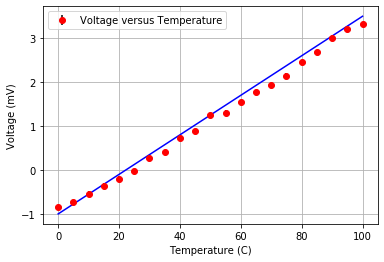

In [77]:
# Solution for plotting data and initial guess

import matplotlib.pyplot as plt
%matplotlib inline


def func(x,m,c):
    return m*x+c




slope = 0.045
intercept = -1
y = func(temp, slope, intercept)
volt_err= (volt*0+0.05)
plt.errorbar(temp, volt, yerr = volt_err, fmt = 'o', color = 'red', ecolor='black' , label = 'Voltage versus Temperature') 

plt.plot(temp, y, c='blue')
plt.grid()
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (mV)')
plt.legend();

<font color="blue">Use <samp>**scipy.optimize.curvefit()**</samp> to fit a straight line to the data. Give the fitting function an initial guess at the parameters (see [non-linear-fitting cell above](#nlfit_cell)). Be sure to include the y-errors in the call of the fitting function so that the fit is weighted. Plot the data with error bars, the line using the intial guess parameters (this is good practice to see that the guess is reasonable) and the line of best fit through the data. Recall,  command is **<samp>popt, pcov=curve_fit(func, x, y, p0=guess, sigma=yerror, absolute_sigma=True)</samp>** </font>

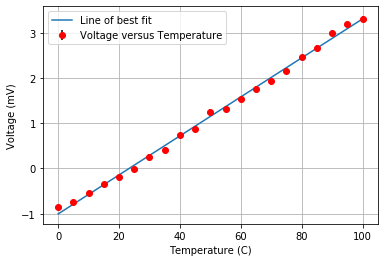

In [80]:
# Solution for plotting data and best-fit curve

from scipy.optimize import curve_fit   
popt, pcov=curve_fit(func, temp, volt, p0=[slope, intercept], sigma=volt_err, absolute_sigma=True)

slope_new = popt[0]
intercept_new = popt[1]

y_new = func(temp, slope_new, intercept_new)
plt.errorbar(temp, volt, yerr = volt_err, fmt = 'o', color = 'red', ecolor='black' , label = 'Voltage versus Temperature')
plt.plot(temp, y_new, label = 'Line of best fit')
plt.grid()
plt.legend()
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (mV)');

## 3) Goodness of fit: linear fit

Make sure you have read and understand the [χ2 cell above](#csq_cell)

<font color="blue"> Calculate the $\chi^2$ value, reduced $\chi^2$ and $\chi^2$ P-value for the linear fit to the data. It might be useful to make your own function for calculating the $\chi^2$ sum. Do the resulting values indicate the fit is good?</font>

In [185]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for linear function

from scipy.stats import chi2  



def chi_squared(data):
    
    total = 0
    for i in range(len(data[:,1])):
        expected = func(data[i,0], slope_new, intercept_new)
        add = ((data[i,1] - expected)/0.05)**2
        total += add
    return total
    
chi_sq = chi_squared(thermocouple)
dof = 21 - 2 
ch_sq_red = chi_sq / dof
print(f"The 𝜒2 value is {chi_sq:.5f}")
print(f"Reduced 𝜒2 is {ch_sq_red:.5f}")

from scipy.stats import chi2
P=chi2.sf(chi_sq, 19)
print(f"The P-value is {P:.6f}")


The 𝜒2 value is 43.46711
Reduced 𝜒2 is 2.28774
The P-value is 0.001119


## 4) Try fit as quadratic polynomial

A different model for the thermocouple data might be a quadratic of the form: 

$$V = a_0 +a_1T + a_2T^2$$

<font color='blue'>Use curve_fit to fit a quadratic function to the data. Plot the data, your initial guess and the quadratic fit. </font>

Quadratic formula used is V = -0.771 + 0.03656 T+ 0.0000214 T^2


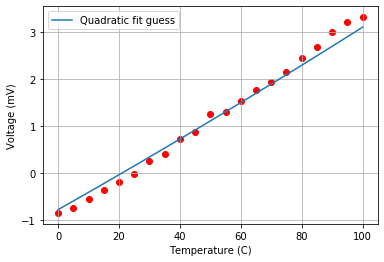

In [173]:
# Solution for quadratic - inital guess
def quad_funct(x,a0,a1,a2):
    return a0+a1*x+a2*x**2

a0=-0.771 
a1=0.03656
a2=0.0000214
V = quad_funct(temp,-0.771,0.03656,0.0000214)
plt.scatter(temp, volt, c='r')
plt.plot(temp, V, label = 'Quadratic fit guess')
plt.grid()
plt.legend()
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (mV)')
print(f"Quadratic formula used is V = -0.771 + 0.03656 T+ 0.0000214 T^2");

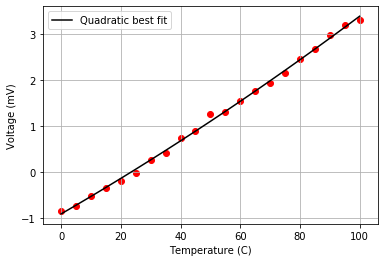

In [174]:
# Solution for quadratic - best fit
popt, pcov=curve_fit(quad_funct, temp, volt, p0=[a0,a1,a2], sigma=volt_err, absolute_sigma=True)
a0_new = popt[0]
a1_new = popt[1]
a2_new = popt[2]
V_new = quad_funct(temp, a0_new, a1_new, a2_new)
plt.plot(temp, V_new, label='Quadratic best fit', c='black')
plt.scatter(temp, volt, c='red')
plt.grid()
plt.legend()
plt.xlabel('Temperature (C)')
plt.ylabel('Voltage (mV)');

<font color ="blue">Calculate a value for the reduced $\chi^2$ for this second fit and compare it with that for the first part. Which is the better fit?</font>

In [191]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for quadratic function
def chi_squared_quad(data):
    
    total = 0
    for i in range(len(data[:,1])):
        expected = quad_funct(data[i,0], a0_new, a1_new, a2_new)
        add = ((data[i,1] - expected)/0.05)**2
        total += add
    return total

chi_sq_quad = chi_squared_quad(thermocouple)
print(f"The value of 𝜒2 for quadratic fit is {chi_sq_quad:.5f}")
print("This is a much better than the linear fit as it is closer to N = 21")
chi_sq_red_quad = chi_sq_quad/19
print(f"The reduced 𝜒2 is {chi_sq_red_quad:.5f} , which is closer to 1 compared to the linear fit 𝜒2 reduced")
P_quad=chi2.sf(chi_sq_quad, 19)
print(f"The P-value is then {P_quad:.5f}")

The value of 𝜒2 for quadratic fit is 26.56349
This is a much better than the linear fit as it is closer to N = 21
The reduced 𝜒2 is 1.39808 , which is closer to 1 compared to the linear fit 𝜒2 reduced
The P-value is then 0.11524


The quadratic fit works a lot better. The 𝜒2 value is closer to N in the quadratic fit. 
Reduced 𝜒2 is clser to 1 than the linear fit and the P-value is also larger, by a factor of 100 which means greater likelihood of getting the value.  

## 3) Radioactive Decay Reprise

<font color="blue">Refit the "counts.dat" data from last week, using an exponential function. You will need to be careful about the initial parameters so again plot the data, the function evaluated using the initial guess parameters and the fit. Please plot the fitted curve with 100 data points over the range so that it looks smooth. Calculate the reduced $\chi^2$ and P-value and comment on their values.</font>

𝜒2 is 6.274395
Reduced 𝜒2 is then 1.254879
The P-value is then 0.28043


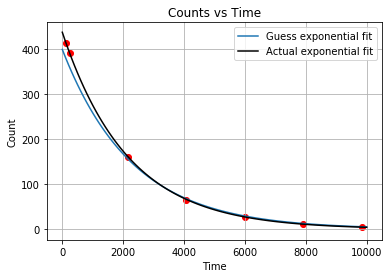

In [256]:
# this is the solution for radioactive decay
count = np.loadtxt("counts.dat")

t = count[:,0]
cts = count[:,1]
def exp(x, a , b):
    return a*np.e**(b*x)
a=400
b=-0.0004357
x = np.linspace(0,10000,100)

plt.plot(x, exp(x,a,b), label = 'Guess exponential fit')
plt.grid()

plt.title('Counts vs Time')
plt.xlabel('Time')
plt.ylabel('Count')
counterror = np.sqrt(cts)
popt, pcov=curve_fit(exp, t, cts, p0=[a,b],sigma=counterror, absolute_sigma=True) 
a_new = popt[0]
b_new = popt[1]
exp_new = exp(x, a_new, b_new)
plt.plot(x, exp_new, c='black', label = 'Actual exponential fit')
plt.scatter(t,cts, c='r')
plt.legend()

def chi_squared_exp(data):
    
    total = 0
    for i in range(len(data[:,1])):
        expected = exp(data[i,0], a, b)
        add = ((data[i,1] - expected)/np.sqrt(data[i,1]))**2
        total += add
    return total

chi_sq_exp = chi_squared_exp(count)

#I have taken the error on the count to be the square root of each point
print(f"𝜒2 is {chi_sq_exp:.6f}")
print(f"Reduced 𝜒2 is then {chi_sq_exp / 5 :.6f}")
print(f"The P-value is then {chi2.sf(chi_sq_exp, 5):.5f}")



The guess fit isn't perfect but according to the reduced 𝜒2 and P-value it is acceptably close to the actual fit

## 4) Concluding Remarks:

Now you should be able to:
1. Use _scipy optimize.curvefit_ to do least squares fitting to arbitrary functions. 
2. Appreciate the importance of weighted a fit to experimental data buy the uncertainty in the points & be able to use
_scipy optimize.curvefit_ to carry out such a fit.
3. Understand the significance of $\chi^2$, the reduced $\chi^2$, and the $\chi^2$ P-value.